# Who Were the Best NFL Receivers in 2018? 

Over the course of this assignment, I will be learning how to access and implement tools in NumPy and Matplotlib. A disclaimer: most of this analysis will be fairly surface level to the point where it is mostly visualizing trends, but I will be able to find more unique trends and create much more interesting visualizations in the future with the knowledge gained. 

My question: are the NFL's current best receivers those who are racking up the biggest statlines, or are there other players who have been more efficient on a per down basis? 
Does certain players pedigrees entitle them to more opporuntities, directly transpiring in inflated statistics, and have others not had the chance to consistently shine?

For this assignment, I will be using the NFL Plays dataset found on Kaggle. Because I am concerned with current player production, I manually stripped all plays before the 2018 season before beginning. 

Without further ado, let's begin:

## Grab the Data
First, let us grab all plays for the 2018 NFL season (up until week 15). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nfl_2018_data = pd.read_csv("C:/Users/cdeme/Documents/Titan Analytics/Python Workspace/nfl2018data.csv", 
                            usecols = [
# general

                                     "posteam",
                                     "yards_gained",
                                     "air_yards",
                                     "yards_after_catch",
                                     "first_down_pass",
                                     "incomplete_pass",
                                     "pass_attempt",
                                     "pass_touchdown",
                                     "complete_pass",
                                     "receiver_player_name",
# for mapping
#                                      "pass_length",
#                                      "pass_location",
# could be interesting
                                     "first_down_pass",
#                                      "interception",
#                                      "fumble_forced",
# for clutch factor
                                     "game_seconds_remaining",
                                     "yardline_100",
                                     "third_down_converted",
                                     "third_down_failed",
                                     "fourth_down_converted",
                                     "fourth_down_failed",
                                     "posteam_timeouts_remaining",
                                     "posteam_score",
                                     "defteam_score"
                                      ])  
# nfl_2018_data.head()


## Clean the Data
Because we are only looking at receivers, I'm going to cut out all rows from the dataset that are not passes.

In [2]:
#only want pass plays
nfl_subset = nfl_2018_data[(nfl_2018_data['incomplete_pass'] == 1) | (nfl_2018_data['complete_pass'] == 1) ]

Let's see what we're working with.

In [3]:
nfl_subset.describe()

,yardline_100,game_seconds_remaining,yards_gained,air_yards,yards_after_catch,posteam_timeouts_remaining,posteam_score,defteam_score,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,pass_attempt,pass_touchdown,complete_pass
count,16058.000000,16050.000000,16058.000000,16056.000000,10713.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.000000,16058.0,16058.000000,16058.000000
mean,51.939968,1692.706044,7.607797,7.798829,5.407636,2.464130,10.216652,13.199527,0.366982,0.104745,0.147901,0.009154,0.008158,0.332856,1.0,0.049570,0.667144
std,23.703082,1042.018440,9.991607,9.966322,7.144571,0.852585,9.150589,10.957449,0.481997,0.306234,0.355013,0.095242,0.089955,0.471250,0.0,0.217062,0.471250
min,1.000000,0.000000,-11.000000,-15.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,34.000000,780.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,56.000000,1790.500000,5.000000,5.000000,3.000000,3.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
75%,72.000000,2550.750000,11.000000,12.000000,8.000000,3.000000,16.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000
max,99.000000,3600.000000,97.000000,60.000000,79.000000,3.000000,52.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


The dataset with all plays is a little unweildly to work with, so I will pull that information out into a new dataframe with player names, catches, yards, and tds.

We will generate a list of names with every player recording a target in the 2018 season. This list will serve as the index for the dataframe. I already know that there are null values in the name column, so I will remove those as well.

In [4]:
passes = nfl_subset.dropna(subset=['receiver_player_name']) #remove plays were no receiver was targetted
#I attempted to do the following but was only left with the value "none": 
#nfl_subset['receiver_player_name'].unique().astype(str).sort()
names = passes['receiver_player_name'].unique() #generate a list of all receiver names
names.sort() # alphabetize
print(names)

['A.Abdullah' 'A.Auclair' 'A.Blue' 'A.Brown' 'A.Callaway' 'A.Carr'
 'A.Collins' 'A.Cooper' 'A.Cross' 'A.Derby' 'A.Ekeler' 'A.Erickson'
 'A.Firkser' 'A.Gates' 'A.Green' 'A.Holmes' 'A.Hooper' 'A.Humphries'
 'A.Hurns' 'A.Janovich' 'A.Jeffery' 'A.Jones' 'A.Kamara' 'A.Luck'
 'A.Miller' 'A.Morris' 'A.Peterson' 'A.Roberts' 'A.Robinson'
 'A.Robinson II' 'A.Seferian-Jenkins' 'A.Shaheen' 'A.Sherman' 'A.Tate'
 'A.Thielen' 'A.Villanueva' 'A.Wilson' 'B.Bell' 'B.Bolden' 'B.Braunecker'
 'B.Butler' 'B.Cooks' 'B.Cunningham' 'B.Ellington' 'B.Fowler' 'B.Jarwin'
 'B.LaFell' 'B.Marshall' 'B.Parker' 'B.Perriman' 'B.Powell' 'B.Quick'
 'B.Roethlisberger' 'B.Sowell' 'B.Watson' 'B.Wilson' 'B.Zylstra'
 'C.Anderson' 'C.Batson' 'C.Beasley' 'C.Beebe' 'C.Brate' 'C.Carson'
 'C.Clay' 'C.Clement' 'C.Coleman' 'C.Conley' 'C.Core' 'C.Daniel' 'C.Davis'
 'C.Edmonds' 'C.Godwin' 'C.Grant' 'C.Ham' 'C.Herndon' 'C.Hogan' 'C.Hyde'
 'C.Ivory' 'C.Kirk' 'C.Kupp' 'C.Latimer' 'C.Manhertz' 'C.McCaffrey'
 'C.Meredith' 'C.Moore' 'C.Patte

In the list of names, there are some inconsistencies in the spelling and recording of player names that have Roman Numeral suffixes. Those are: 'A.Robinson' 'A.Robinson II', 'R.Jones' 'R.Jones II', and 'W.Snead' 'W.Snead IV'.
To deal with that, I will edit all rows of the dataset that have a misspelling.

In [5]:
for index in passes.index.values:
#This must be done in a careful order with the current implementation: if searching for " I" first, 
#names such as "... II" will be converted to "...I", or "... IV" to "...V"
    if " IV" in passes.at[index, 'receiver_player_name']:
        passes.at[index, 'receiver_player_name'] = passes.at[index, 'receiver_player_name'].replace(" IV", "")
    if " III" in passes.at[index, 'receiver_player_name']:
        passes.at[index, 'receiver_player_name'] = passes.at[index, 'receiver_player_name'].replace(" III", "")
    if " II" in passes.at[index, 'receiver_player_name']:
        passes.at[index, 'receiver_player_name'] = passes.at[index, 'receiver_player_name'].replace(" II", "")
    if " I" in passes.at[index, 'receiver_player_name']:
        passes.at[index, 'receiver_player_name'] = passes.at[index, 'receiver_player_name'].replace(" I", "")

names = passes['receiver_player_name'].unique()
names.sort()
print(names)

['A.Abdullah' 'A.Auclair' 'A.Blue' 'A.Brown' 'A.Callaway' 'A.Carr'
 'A.Collins' 'A.Cooper' 'A.Cross' 'A.Derby' 'A.Ekeler' 'A.Erickson'
 'A.Firkser' 'A.Gates' 'A.Green' 'A.Holmes' 'A.Hooper' 'A.Humphries'
 'A.Hurns' 'A.Janovich' 'A.Jeffery' 'A.Jones' 'A.Kamara' 'A.Luck'
 'A.Miller' 'A.Morris' 'A.Peterson' 'A.Roberts' 'A.Robinson'
 'A.Seferian-Jenkins' 'A.Shaheen' 'A.Sherman' 'A.Tate' 'A.Thielen'
 'A.Villanueva' 'A.Wilson' 'B.Bell' 'B.Bolden' 'B.Braunecker' 'B.Butler'
 'B.Cooks' 'B.Cunningham' 'B.Ellington' 'B.Fowler' 'B.Jarwin' 'B.LaFell'
 'B.Marshall' 'B.Parker' 'B.Perriman' 'B.Powell' 'B.Quick'
 'B.Roethlisberger' 'B.Sowell' 'B.Watson' 'B.Wilson' 'B.Zylstra'
 'C.Anderson' 'C.Batson' 'C.Beasley' 'C.Beebe' 'C.Brate' 'C.Carson'
 'C.Clay' 'C.Clement' 'C.Coleman' 'C.Conley' 'C.Core' 'C.Daniel' 'C.Davis'
 'C.Edmonds' 'C.Godwin' 'C.Grant' 'C.Ham' 'C.Herndon' 'C.Hogan' 'C.Hyde'
 'C.Ivory' 'C.Kirk' 'C.Kupp' 'C.Latimer' 'C.Manhertz' 'C.McCaffrey'
 'C.Meredith' 'C.Moore' 'C.Patterson' 'C.Peake' 

Now that we have a dataset with all the offensive plays, we can further refine the data into grouping each receiver's plays together.

Let create a new dataframe listing each receiver's 2018 yearly statistics.

When playing with the data, I found that may rows for the 'yards_after_catch' column have NAN values (when a receiver catches a ball and then does not progress any farther. I will edit those now.

In [6]:
# replace nan values with 0
passes['yards_after_catch'].fillna(0, inplace=True)

C:\Users\cdeme\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Another thing to fix: On incomplete passes, the plays air yards are still recorded. This would be useful information for tracking where players are targeted, but for now, I am going to strip that out.

In [7]:
# if pass incomplete, airyards = 0
for index in passes.index.values:
    if passes.loc[index, 'incomplete_pass'] == 1:
        passes.at[index, 'air_yards'] = 0

## What did 2018 look like in the NFL?
Now that the dataset of plays is cleaned, I will use it to generate look at general receiving trends for 2018.

In [8]:
yearstats = pd.DataFrame(index = names, columns=['catches', 'yards', 'tds', 'air yards', 
                                                 'yac', 'first downs', 'incomplete passes', 'pass attempts'])
for name in names:
    ctchs = sum(passes[passes["receiver_player_name"] == name]["complete_pass"])
    yds = sum(passes[passes["receiver_player_name"] == name]["yards_gained"])    
    tds = sum(passes[passes["receiver_player_name"] == name]["pass_touchdown"])
    ays = sum(passes[passes["receiver_player_name"] == name]["air_yards"])
    ydsac = sum(passes[passes["receiver_player_name"] == name]["yards_after_catch"])
    fd = sum(passes[passes["receiver_player_name"] == name]["first_down_pass"])
    ip = sum(passes[passes["receiver_player_name"] == name]["incomplete_pass"])
    pa = sum(passes[passes["receiver_player_name"] == name]["pass_attempt"])
    yearstats.loc[name] = [ctchs, yds, tds, ays, ydsac, fd, ip, pa]
#yearstats.head()

Let's see who the top 5 players are in catches, receiving yards, and tds:

In [9]:
print("Catches:")
print(yearstats['catches'].sort_values(ascending = False).head(), '\n')

print("Yards:")
print(yearstats['yards'].sort_values(ascending = False).head(), '\n')

print("Tds:")
print(yearstats['tds'].sort_values(ascending = False).head(), '\n')

Catches:
M.Thomas     117
Z.Ertz       115
J.Jones      107
A.Thielen    105
D.Adams      104
Name: catches, dtype: object 

Yards:
J.Jones     1617
T.Hill      1422
M.Evans     1379
D.Adams     1372
M.Thomas    1337
Name: yards, dtype: object 

Tds:
A.Brown      14
E.Ebron      14
D.Adams      14
T.Hill       13
D.Hopkins    11
Name: tds, dtype: object 



Nothing really too surprising here other than seeing <b>Zach Ertz</b> nearly leading the league in catches as a TE. Similarly, <b>Eric Ebron</b> was consistently creating space in the end zone for scores, however this may largely be due to the fact that Ebron was commanding mismatches with slow LBs or small DBs. Zach Ertz's feat is more impressive because he is clearly the Eagles primary receiver despite juggling responsibilities as a blocker as well. I wonder how efficient Zach Ertz was on a per-play basis.

Now that I'm starting to get a handle of the data, let's visualize it.

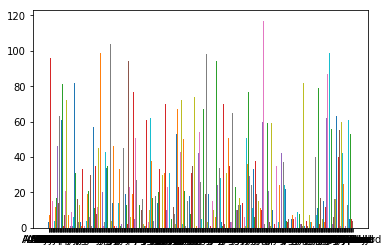

In [10]:
for player in yearstats.index:
    plt.bar(player, yearstats.loc[player,'catches'])

Well sh*t, that's a mess. Back to the data(drawing)set(board) to narrow down the amount of information we're working with. 

Teams use their best players. If I'm trying to evaluate who the best receivers in the NFL were in 2018, than I should look at those players who saw significant involvment in their offenses. Thus, I've going to decided to drop from the dataframe all players who have less than 50 targets.

In [11]:
for player in yearstats.index:
    if yearstats.loc[player, 'pass attempts'] < 50:
        yearstats.drop(index=player, inplace=True)
yearstats.describe()

,catches,yards,tds,air yards,yac,first downs,incomplete passes,pass attempts
count,111.0,111,111.0,111.0,111.0,111.0,111.0,111.0
unique,55.0,104,14.0,101.0,97.0,47.0,42.0,65.0
top,45.0,581,5.0,-53.0,135.0,27.0,16.0,90.0
freq,7.0,2,18.0,2.0,3.0,6.0,7.0,5.0


That about quartered the number of players being looked at. Let's see if that clears anything up.

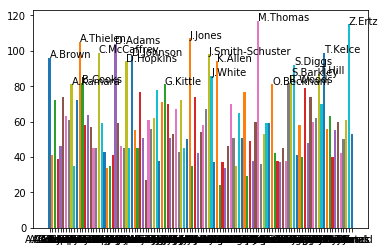

In [12]:
for player in yearstats.index:
    catches = yearstats.loc[player, 'catches']
    plt.bar(player, catches)
    if catches > 80:
        plt.text(player, catches, player)

All right, that's a little better, but still very clutterd. Maybe you could read this with a magnafying glass that could disguinish overlapping text.

This still does not really tell us much beyond the raw receiving output. Let's look at how those yards break down between air yards and run after the catch.

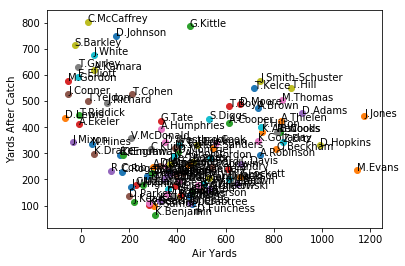

In [13]:
# I tried:
# ax = yearstats.plot.scatter(x='air yards', y='yac')
# but needed to first set the dtype for the dataframe. This messed with the accuracy of the data
for player in yearstats.index:
    ay = yearstats.loc[player, 'air yards']
    yac = yearstats.loc[player,'yac']
    plt.scatter(ay, yac)
    plt.annotate(player, ((ay, yac))) 
    # add if statement to only include certain names
plt.xlabel('Air Yards')
plt.ylabel('Yards After Catch');
# add trendline
# figure out how to hide text unless cursoring over data points
# plt.plot()

Some trends here: <ul>
    <li>Most receivers fall somewhere in the middle mass of players who generate most of their yards through the air with some production of their own on the ground. 
    <li>Running backs tend to gain most of their yards after the catch as they catch screens and other short passes to get them the ball in space
    <li><b>George Kittle</b> was in a league of his own when it comes to creating yards on his own: a formidible receiver in his own right, kittle far outstripped Tyreek Hill, Antonio Brown, and every other reciever when it comes to running with the pigskin
    <li><b>Kelvin Benjamin</b> cannot run
    <li><b>Mike Evans</b> is a phenominal receiver, but it would seem that his yards after catch should be quite higher considering how many air yards he had.</ul>

However, I still do not like this visualization. Players with a ton of opporunities are favored more heavily. Let's create a new plot that looks at a per catch basis.

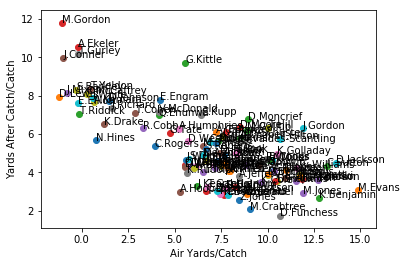

In [14]:
for player in yearstats.index:
    catches = yearstats.loc[player, 'catches']
    aypc = yearstats.loc[player, 'air yards']/catches
    yacpc = yearstats.loc[player,'yac']/catches
    plt.scatter(aypc, yacpc)
    plt.annotate(player, (aypc, yacpc))
plt.xlabel('Air Yards/Catch')
plt.ylabel('Yards After Catch/Catch');
# add trendline

My takeaways:<ul>
    <li><b>Geoge Kittle</b> you beast
    <li><b>Mike Evans</b>, while still in the lower echelon of yardage creating receivers, still is respectable compared ot the league average.
    <li>The 'Has no legs king' prize now goes to <b>Devin Funchess</b>, who had an abysmal YAC/reception (fortunately he makes up for it with his air yards per reception)
    <li>Imagine if offensive coordinators could get the ball to their running backs farther down the field while still putting their player in a position to run in space. Perhaps their production is skewwed by screen plays where they still have lead blockers
</ul>


A few other broad statistics that I'm curious about:
<ul>   
    <li>Catch rate
    <li>Rate of First Downs (per target)
    <li>% of Team's Offensive Production <b>(what about when a player has been traded, I.E. Golden Tate?)</b>
    <li>% of Team's Offensive Scoring <b>(See above)</b>
</ul>
I will quickly generate the first two statistics below.

Text(0.5, 0.98, 'Catch Rate')

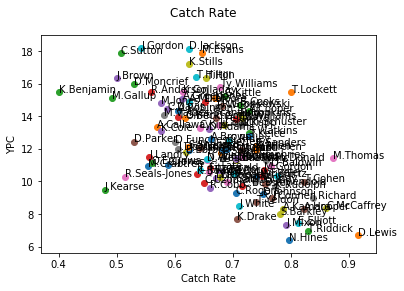

In [15]:
for player in yearstats.index:
    catches = yearstats.loc[player, 'catches']
    pa = yearstats.loc[player, 'pass attempts']
    # how often players get the ball
    cr = catches/pa
    # what players do once they get the ball
    ypc = yearstats.loc[player,'yards']/catches
    plt.scatter(cr, ypc)
    plt.annotate(player, (cr, ypc))
plt.xlabel('Catch Rate')
plt.ylabel('YPC');
plt.suptitle("Catch Rate")
# add trendline

Takeaways: <ul>
    <li><b>Dion Lewis</b> catches nearly everything but his yards per catch is incredibly short
    <li><b>Michael Thomas</b> is nearly automatic in terms of catching balls
    <li><b>Tyler Locket</b> has an incredibly catch-rate to yards-per-catch ratio. Is his efficiency a product of small-ish sample size or are the Seahawks criminally underusing him?
    <li>Not only can <b>Kelvin Benjamin</b> not run, but he also can't catch
</ul>

Text(0.5, 0.98, 'First Down Rate v Yards per Target')

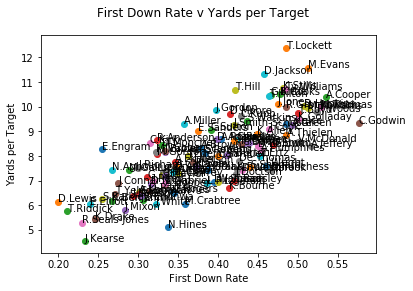

In [16]:
for player in yearstats.index:
    # decided to look at fdr on per target basis as opposed to per catch
    pa = yearstats.loc[player, 'pass attempts']
    fdr = yearstats.loc[player, 'first downs']/pa
    ypc = yearstats.loc[player,'yards']/pa
    plt.scatter(fdr, ypc)
    plt.annotate(player, (fdr, ypc))
plt.xlabel('First Down Rate')
plt.ylabel('Yards per Target');
plt.suptitle("First Down Rate v Yards per Target")
# add trendline

Text(0.5, 0.98, 'First Down Rate v Yards per Target')

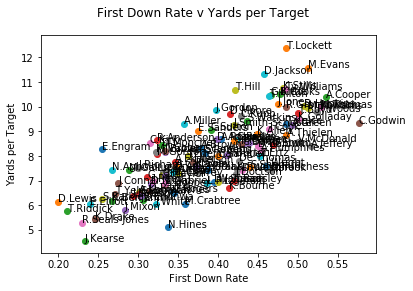

In [17]:
for player in yearstats.index:
    # decided to look at fdr on per target basis as opposed to per catch
    pa = yearstats.loc[player, 'pass attempts']
    fdr = yearstats.loc[player, 'first downs']/pa
    ypc = yearstats.loc[player,'yards']/pa
    plt.scatter(fdr, ypc)
    plt.annotate(player, (fdr, ypc))
plt.xlabel('First Down Rate')
plt.ylabel('Yards per Target');
plt.suptitle("First Down Rate v Yards per Target")
# add trendline

Takeaways:<ul>
    <li>As hinted at by his YPC, <b>Dion Lewis</b> struggled getting first downs
    <li>How could <b>Nyiem Hynes</b> gain first downs so much more consistently than Dion Lewis with an even shorter YPC
    <li><b>Chris "Reliable" Godwin</b> was by far the most efficicent receiver at gaining first downs
</ul>

Text(0.5, 0.98, 'YPC v Catches')

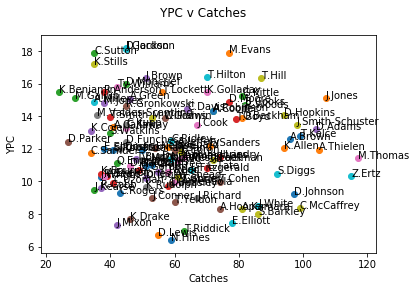

In [18]:
for player in yearstats.index:
    catches = yearstats.loc[player, 'catches']
    ypc = yearstats.loc[player, 'yards']/catches
    plt.scatter(catches, ypc)
    plt.annotate(player, (catches, ypc))
plt.xlabel('Catches')
plt.ylabel('YPC');
plt.suptitle("YPC v Catches")
# add trendline

<ul>
    <li><b>Julio Jones</b> is in a league of his own in terms of racking up yardage
    <li><b>Michael Thomas</b> and <b>Zach Ertz</b> can challenge Julio's dominance when it comes to volume, but they were no where near Julio's raw production
    <li>An upper tier of receivers seems to form around those who catch more than 70 passes and average more than 12 yards per catch. Not only are these players efficient, but they're not only deep ball specialists like those at the top left of the chart
</ul>

Text(0.5, 0.98, 'Catch Rate v First Down Rate')

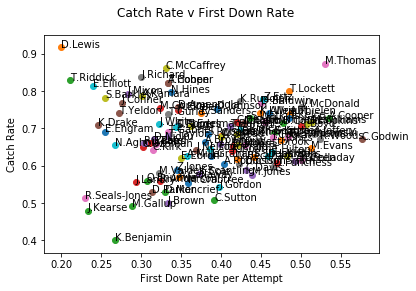

In [19]:
for player in yearstats.index:
    pa = yearstats.loc[player, 'pass attempts']
    catches = yearstats.loc[player, 'catches']
    fdr = yearstats.loc[player, 'first downs']/pa
    cr = catches/pa
    plt.scatter(fdr, cr)
    plt.annotate(player, (fdr, cr))
plt.xlabel('First Down Rate per Attempt')
plt.ylabel('Catch Rate');
plt.suptitle("Catch Rate v First Down Rate")
# add trendline

<ul>
    <li><b>Michael Thomas</b>. Wow.
    <li>Get <b>Tyler Lockett</b> the ball more
    <li>Despite getting yards when he catches the ball, <b>Kelvin Benjamin</b> may be the least efficient player in the league
</ul>

## Captain Clutch

I want to look at the receivers who were consistently getting it done when teams needed them most. I set these criteria for defining clutch plays: <ul>
    <li>Plays on 3rd down
    <li>Plays of 4th down
    <li>Plays within the last 2 minutes of the game
    <li>Plays when trailing in the 4th quarter
</ul>
To analyze this, I'm making a new dataframe by collecting the following statistics when they satisfy the clutch criteria: <ul>
    <li>Catches
    <li>Yards
    <li>Yards after catch
    <li>Air yards
    <li>Tds
    <li>Targets
</ul>
I also want to look at percentages of team production, so I will also track individual and team: <ul> 
    <li>Yards
    <li>Tds
    <li>First downs
</ul>

In [20]:
# Clutch factor: Defined as plays on 3rd down, 4th down, with 2 mins or less remaining, 
# in the red zone, or when trailing in the 4th quarter.
# only looking at players with at least 20 targets

clutchplays = pd.DataFrame(index = names, columns=['clutch catches', 'clutch yards', 'clutch yac', 'clutch air yards',
                                                   'clutch tds', 'clutch targets', 'team','total yards', 'team yards', 'total tds', 'team tds',  
                                                   'first downs', 'team first downs'
                                                  ])
    # red zone plays

for name in names:
    namecriteria = (passes["receiver_player_name"]==name)
    clutchcriteria = (namecriteria #match plays to player
                & (((passes["posteam_score"]< passes["defteam_score"]) # trailing
                & (passes["game_seconds_remaining"] <= 900)) # and within 4th quarter
                | (passes["third_down_converted"] == 1) #third down
                | (passes["fourth_down_converted"] == 1) #4th down
                | (passes["yardline_100"]<=20)
                | (passes["game_seconds_remaining"] <= 120))) # within 2 mins
    
    ca = passes.loc[clutchcriteria, "pass_attempt"].sum()
    
    if ca < 20: # cutting players with at least 20 clutch targets
        clutchplays.drop(index=name, inplace=True)
        continue
        
    ccatches = passes.loc[clutchcriteria, "complete_pass"].sum()
    cyards = passes.loc[clutchcriteria, "yards_gained"].sum()
    cyac = passes.loc[clutchcriteria, "yards_after_catch"].sum()
    cay = passes.loc[clutchcriteria, "air_yards"].sum()
    ctds = passes.loc[clutchcriteria, "pass_touchdown"].sum()
    totyards = passes.loc[namecriteria, "yards_gained"].sum()
    
    ind = passes.index[namecriteria].tolist()[-1] #get index of row with team name. Looking at player's end teams
    team = passes.at[ind, 'posteam'] #get team name
    teamcriteria = (passes["posteam"]==team)
    
    teamyards = passes.loc[teamcriteria, "yards_gained"].sum() #to be used in comparing total offensive output
    tottds = passes.loc[namecriteria, "pass_touchdown"].sum()  
    teamtds = passes.loc[teamcriteria, "pass_touchdown"].sum()
    fd = passes.loc[namecriteria, "first_down_pass"].sum()
    teamfd = passes.loc[teamcriteria, "first_down_pass"].sum()
    clutchplays.loc[name] = [ccatches, cyards, cyac, cay, ctds, ca, team, totyards, teamyards, tottds, teamtds, fd, teamfd]
# clutchplays.describe()

<b>Note</b>: if a player switched teams, I assigned their most recent team to their dataframe and used their stats for the entire season. 

Let's look at players' percentages of team output. These are only players with 20 clutch plays or more.

Text(0.5, 0.98, '% offensive production')

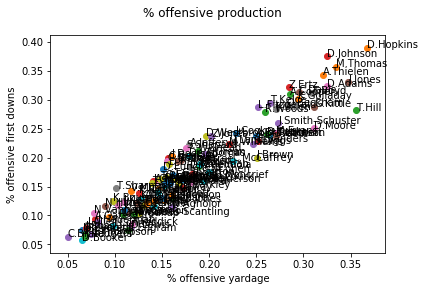

In [21]:
for player in clutchplays.index:
    yards = clutchplays.loc[player, 'total yards']
    teamyards = clutchplays.loc[player, 'team yards']
    fds = clutchplays.loc[player, 'first downs']
    teamfds = clutchplays.loc[player, 'team first downs']   
    y = yards/teamyards
    f = fds/teamfds
    plt.scatter(y, f)
    plt.annotate(player, (y, f))
plt.xlabel('% offensive yardage')
plt.ylabel('% offensive first downs');
plt.suptitle("% offensive production")
# add trendline

I should have seen this one coming. It makes sense that there is such a direct correlation betweem % of offensive yardage and % of first downs. Let's see if this hold true for scoring.

Text(0.5, 0.98, '% offensive production')

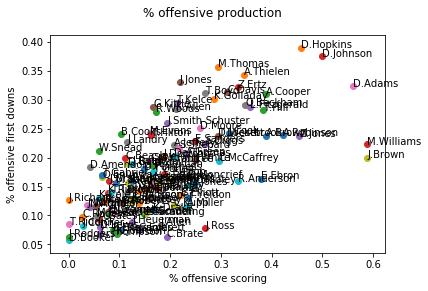

In [22]:
for player in clutchplays.index:
    tds = clutchplays.loc[player, 'total tds']
    teamtds = clutchplays.loc[player, 'team tds']
    fds = clutchplays.loc[player, 'first downs']
    teamfds = clutchplays.loc[player, 'team first downs']   
    t = tds/teamtds
    f = fds/teamfds
    plt.scatter(t, f)
    plt.annotate(player, (t, f))
plt.xlabel('% offensive scoring')
plt.ylabel('% offensive first downs');
plt.suptitle("% offensive production")
# add trendline

Now let's look at clutch catch rate and yards per clutch attempt.

Text(0.5, 0.98, 'clutch catch rate v yards per attempt')

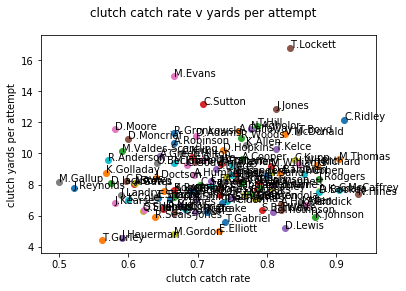

In [23]:
for player in clutchplays.index:
    cc = clutchplays.loc[player, 'clutch catches']
    ct = clutchplays.loc[player, 'clutch targets']
    cy = clutchplays.loc[player, 'clutch yards']
    ccr = cc/ct #clutch catch rate
    cypa = cy/ct # clutch yards per attempt
    plt.scatter(ccr, cypa)
    plt.annotate(player, (ccr, cypa))
plt.xlabel('clutch catch rate')
plt.ylabel('clutch yards per attempt');
plt.suptitle("clutch catch rate v yards per attempt")
# add trendline

## The Receiving Hierarchy
Ok, now that we've looked at a number of stats, let's see who's the best overall. After looking at the data, this is what I determined are the key stats: <ul>
    <li><b>Catch Rate:</b> Does the reciever catch his passes?
    <li><b>First Down Rate per Attempt:</b> Does the receiver keep his offense on track?
    <li><b>Yards per Target:</b> How much does the player help the greater offense?
    <li><b>Touchdowns per Target:</b> You have to score to win right?
    <li><b>Target Share:</b> How much does the receiver carry his team on his shoulders?
</ul>
All of the above I will factor for both clutch and normal* conditions.

I will also place some emphasis placed on the following under normal conditions: <ul>
    <li><b>Air Yards per Target:</b> Where is the player used?
    <li><b>Yards After Catch per Catch:</b> What does the player do once he gets the ball?
</ul>
* <i>Normal implies non-clutch conditions</i>

To create a "Receiver Score," I will rate each player on the above criteria based in comparison to the best player in the league at that metric. 

For example, Dion Lewis will receive a perfect "Catch Rate" score, with Michael Thomas right behind him, and so on until Kelvin Benjamin.

Let's create a new dataframe to work with. I also have to re-load the data to make sure air yards are accounted for on incomplete passes.

As with the clutch plays dataframe, I will drop players who do not meet minimum usage requirements. I have set those minimums to 25 normal targets and 10 clutch players.

In [25]:
nfl_dataset = pd.read_csv("C:/Users/cdeme/Documents/Titan Analytics/Python Workspace/nfl2018data.csv", 
                            usecols = [
                                     "posteam",
                                     "pass_attempt",
                                     "complete_pass",
                                     "yards_gained",
                                     "air_yards",
                                     "yards_after_catch",
                                     "first_down_pass",
                                     "pass_touchdown",
                                     "receiver_player_name",
                                     "game_seconds_remaining",
                                     "yardline_100",
                                     "down",
                                     "posteam_score",
                                     "defteam_score"
                                      ])  

In [26]:
playdata = nfl_dataset[(nfl_dataset['pass_attempt'] == 1)] #remove non passing plays
finaldataset = playdata.dropna(subset=['receiver_player_name']) #remove plays were no receiver was targetted
finaldataset['yards_after_catch'].fillna(0, inplace=True) #replace NaN values with 0  

C:\Users\cdeme\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
# Clutch factor: Defined as plays on 3rd down, 4th down, with 2 mins or less remaining, 
# in the red zone, or when trailing in the 4th quarter.
# only looking at players with at least 20 targets

finalstats = pd.DataFrame(index = names, columns=[
                                                   'catch rate', 'first down per target', 'yards per target', 
                                                   'touchdowns per target', 'target share',
                                                   'clutch catch rate', 'clutch first down per target', 
                                                   'clutch yards per target', 'clutch touchdowns per target', 
                                                   'clutch target share',
                                                   'air yards per target', 'yac per catch'
# for checking if null values
#                                                   'air yards', 'yac', 'catches', 'targets', 'yards', 'tds', 'fds',
#                                                   'ccatches', 'ctargets', 'cyards', 'ctds', 'cfds'
                                                  ])
for name in names:
    # criteria for selecting correct frames within dataframe 
    namecriteria = (finaldataset["receiver_player_name"]==name)
    clutch = (((finaldataset["posteam_score"]< finaldataset["defteam_score"]) # trailing
                & (finaldataset["game_seconds_remaining"] <= 900)) # and within 4th quarter
                | (finaldataset["down"] == 3) #third down
                | (finaldataset["down"] == 4) #4th down
                | (finaldataset["yardline_100"]<=20)
                | (finaldataset["game_seconds_remaining"] <= 120)) # within 2 mins
    notclutch = (((finaldataset["posteam_score"]> finaldataset["defteam_score"]) # trailing
                | (finaldataset["game_seconds_remaining"] >= 900)) # and within 4th quarter
                & (finaldataset["down"] != 3) #third down
                & (finaldataset["down"] != 4) #4th down
                & (finaldataset["yardline_100"]>=20)
                & (finaldataset["game_seconds_remaining"] >= 120)) # within 2 mins
    clutchcriteria = namecriteria & clutch
    notclutchcriteria = namecriteria & notclutch
    ind = finaldataset.index[namecriteria].tolist()[-1] #get index of row with team name. Looking at player's end teams
    team = finaldataset.at[ind, 'posteam'] #get team name
    teamcriteria = (finaldataset["posteam"]==team)
    teamclutchcriteria = (teamcriteria & clutch)
    teamnotclutchcriteria = (teamcriteria & notclutch)
    
    targets = finaldataset.loc[notclutchcriteria, "pass_attempt"].sum()
    if targets < 20: # cutting players with at least 20 clutch targets
        finalstats.drop(index=name, inplace=True)
        continue
        
    ctargets = finaldataset.loc[clutchcriteria, "pass_attempt"].sum()
    if ctargets < 5:
        finalstats.drop(index=name, inplace=True)
        continue
    
    catches = finaldataset.loc[notclutchcriteria, "complete_pass"].sum()
    ccatches = finaldataset.loc[clutchcriteria, "complete_pass"].sum()
    
    yards = finaldataset.loc[notclutchcriteria, "yards_gained"].sum()
    cyards = finaldataset.loc[clutchcriteria, "yards_gained"].sum()

    tds = finaldataset.loc[notclutchcriteria, "pass_touchdown"].sum()
    ctds = finaldataset.loc[clutchcriteria, "pass_touchdown"].sum()
    
    fd = finaldataset.loc[notclutchcriteria, "first_down_pass"].sum()
    cfd = finaldataset.loc[clutchcriteria, "first_down_pass"].sum()


    teamcatches = finaldataset.loc[teamclutchcriteria, "complete_pass"].sum()
    cteamcatches = finaldataset.loc[teamnotclutchcriteria, "complete_pass"].sum()
    
    yac = finaldataset.loc[namecriteria, "yards_after_catch"].sum()
    
    ay = finaldataset.loc[namecriteria, "air_yards"].sum()

    finalstats.loc[name] = [
                             catches/targets, fd/targets, yards/targets, tds/targets, catches/teamcatches, 
                             ccatches/ctargets, cfd/ctargets, cyards/ctargets, ctds/ctargets, ccatches/cteamcatches, 
                             ay/(targets + ctargets), yac/(catches + ccatches)
# for checking for any null values
#                             ay, yac,
#                             catches, targets, yards, tds, fd, ccatches, ctargets, cyards, ctds, cfd
                           ]

In [28]:
finalstats.fillna(value = 0, inplace = True)
finalstats.isnull().values.any()
# finalstats.head()
finalstats.describe()

,catch rate,first down per target,yards per target,touchdowns per target,target share,clutch catch rate,clutch first down per target,clutch yards per target,clutch touchdowns per target,clutch target share,air yards per target,yac per catch
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.698924,0.355210,8.491954,0.023162,0.179170,0.625718,0.391370,6.916950,0.087403,0.136968,8.361892,5.305165
std,0.111202,0.107252,2.190400,0.029453,0.081272,0.124234,0.104202,1.882051,0.065897,0.076300,4.666204,2.061365
min,0.260870,0.080000,3.120000,0.000000,0.039735,0.250000,0.000000,1.571429,0.000000,0.012048,-1.780488,1.733333
25%,0.632578,0.279444,6.635809,0.000000,0.118773,0.546364,0.324186,5.573415,0.045979,0.080343,5.965171,3.865229
50%,0.703333,0.345141,8.349359,0.015079,0.155990,0.628802,0.393612,6.792696,0.078462,0.127220,8.989655,4.689898
75%,0.767308,0.437881,9.957763,0.035714,0.224402,0.693913,0.459459,7.991873,0.115524,0.179663,11.573368,6.362943
max,0.969697,0.600000,13.888889,0.156250,0.428571,1.000000,0.652174,13.512821,0.375000,0.467290,18.205128,12.642857


Now we have all these stats correctly collected (at least I think so. There were some strange NaN values that occured when I created my dataframe with the division equations, but none of the actual statistics were null. Perhaps there were divide by zero errors). 

So how shall we weight each metric?

### Final Score Rubric
I shall weight normal plays and clutch plays equally. Despite the normal plays comprising of a much larger proportion of most players overall stats, each play in the clutch is far more valuable. For example, 50% of the Catch Rate category will be dependent on clutch plays and 10% of the final overall score is dependent on clutch Catch Rate.

The breakdowns for each category are as follows:

<ul>
    <li>Catch Rate: <b>25%</b>
    <li>First Down Rate per Target: <b>18%</b>
    <li>Yards per Target: <b>20%</b>
    <li>Touchdowns per Target: <b>15%</b>
    <li>Target Share: <b>12%</b>
    <li>Air Yards per Target: <b>5%</b>
    <li>Yards After Catch per Catch: <b>5%</b>
</ul>
    
I'll admit, these are fairly arbitrary weights to assign to each variable. There should be more analysis done to figure out which stats actually matter.

In [29]:
cr_scale = 0.25/2./finalstats['catch rate'].max()
fdpt_scale = 0.18/2./finalstats['first down per target'].max()
ypt_scale = 0.20/2./finalstats['yards per target'].max()
tdpt_scale = 0.15/2./finalstats['touchdowns per target'].max()
ts_scale = 0.12/2./finalstats['target share'].max()

ccr_scale = 0.25/2./finalstats['clutch catch rate'].max()
cfdpt_scale = 0.18/2./finalstats['clutch first down per target'].max()
cypt_scale = 0.20/2./finalstats['clutch yards per target'].max()
ctdpt_scale = 0.15/2./finalstats['clutch touchdowns per target'].max()
cts_scale = 0.12/2./finalstats['clutch target share'].max()

aypt_scale = 0.05/finalstats['air yards per target'].max()
yacpc_scale = 0.05/finalstats['yac per catch'].max()
# print(fdpt_scale)

In [30]:
# score metric
# I'm sure there's a way that I can make a dataframe or series with all the weights 
# to multiply the stats dataframe by, but as of now I'm not sure how to do that.

scores = pd.DataFrame(index = finalstats.index, columns = ["score"])

for player in scores.index:
    scor = ((cr_scale * finalstats.loc[player, 'catch rate'])
                          + (fdpt_scale * finalstats.loc[player, 'first down per target'])
                          + (ypt_scale * finalstats.loc[player, 'yards per target'])
                          + (tdpt_scale * finalstats.loc[player, 'touchdowns per target'])
                          + (ts_scale * finalstats.loc[player, 'target share'])
                          + (ccr_scale * finalstats.loc[player, 'clutch catch rate'])
                          + (cfdpt_scale * finalstats.loc[player, 'clutch first down per target'])
                          + (cypt_scale * finalstats.loc[player, 'clutch yards per target'])
                          + (ctdpt_scale * finalstats.loc[player, 'clutch touchdowns per target'])
                          + (cts_scale * finalstats.loc[player, 'clutch target share'])
                          + (aypt_scale * finalstats.loc[player, 'air yards per target'])
                          + (yacpc_scale * finalstats.loc[player, 'yac per catch'])
                         )
    scores.loc[player] = scor
#     print(scor)
# scores.head()

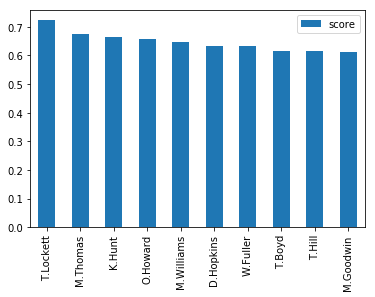

In [31]:
sorted_scores = scores.sort_values(by = "score", ascending = False)
# print(sorted_scores)
sorted_scores.head(10).plot.bar()

In [32]:
finalstats.loc['T.Lockett']

catch rate                       0.906250
first down per target            0.437500
yards per target                10.687500
touchdowns per target            0.156250
target share                     0.202797
clutch catch rate                0.692308
clutch first down per target     0.512821
clutch yards per target         13.512821
clutch touchdowns per target     0.128205
clutch target share              0.217742
air yards per target            12.450704
yac per catch                    3.732143
Name: T.Lockett, dtype: float64

In [33]:
finalstats.loc['M.Thomas']

catch rate                       0.880000
first down per target            0.493333
yards per target                10.813333
touchdowns per target            0.013333
target share                     0.428571
clutch catch rate                0.841270
clutch first down per target     0.555556
clutch yards per target          8.476190
clutch touchdowns per target     0.142857
clutch target share              0.254808
air yards per target             7.405797
yac per catch                    4.226891
Name: M.Thomas, dtype: float64

In [34]:
finalstats.loc['K.Hunt']

catch rate                       0.714286
first down per target            0.380952
yards per target                 9.952381
touchdowns per target            0.095238
target share                     0.104895
clutch catch rate                0.764706
clutch first down per target     0.588235
clutch yards per target         11.411765
clutch touchdowns per target     0.294118
clutch target share              0.059091
air yards per target             2.026316
yac per catch                   12.642857
Name: K.Hunt, dtype: float64

In [35]:
finalstats.loc['O.Howard']

catch rate                       0.700000
first down per target            0.566667
yards per target                12.733333
touchdowns per target            0.033333
target share                     0.123529
clutch catch rate                0.714286
clutch first down per target     0.619048
clutch yards per target         10.904762
clutch touchdowns per target     0.190476
clutch target share              0.071090
air yards per target            11.509804
yac per catch                    5.861111
Name: O.Howard, dtype: float64

In [36]:
finalstats.loc['M.Williams']

catch rate                       0.800000
first down per target            0.500000
yards per target                13.433333
touchdowns per target            0.100000
target share                     0.179104
clutch catch rate                0.630435
clutch first down per target     0.500000
clutch yards per target          7.260870
clutch touchdowns per target     0.152174
clutch target share              0.167630
air yards per target            11.407895
yac per catch                    3.867925
Name: M.Williams, dtype: float64

In [37]:
finalstats.loc['D.Hopkins']

catch rate                       0.714286
first down per target            0.460317
yards per target                10.507937
touchdowns per target            0.031746
target share                     0.328467
clutch catch rate                0.666667
clutch first down per target     0.536232
clutch yards per target          8.695652
clutch touchdowns per target     0.130435
clutch target share              0.310811
air yards per target            12.015152
yac per catch                    3.637363
Name: D.Hopkins, dtype: float64

## Human Highlight Reels (TBA)
Unfortunately, I did not get to this section in time. If I continue to work on this, I will break down a few individual seasons more meticulously. Perhaps by looking at game conditions (time, yardline, etc.) I would be able to determine if these players were put in more favorable positions to succeed or if they are just dominant in their own right.
Those players include:<ul>
    <li>George Kittle - so may yards before and after the catch
    <li>Michael Thomas - automatic in terms of catches and first downs
    <li>Tyler Lockett - incredibly efficient on a per target basis
    <li>Julio Jones - not only is the ball forced to him (catches), but he routinely comes down with it downfield
</ul>

Conditions to look at: <ul>
    <li>Usage in specific conditions (3rd and long, 4th down, 1st down, goal-to-go, etc.)
    <li>How teammates/players around the league fared in similar conditions
    <li>Game flow and previous plays impacting usage
</ul>

### Other ideas I didn't get around to looking at:

<b>Stats</b>
<ul>
    <li>Timing of plays
    <li>Big plays
    <li>Fumbles/interceptions per target
</ul>
<b>Plotting</b>
<ul>    
    <li>Heat mapping receiver usage (left/middle/right, short/medium/deep)
    <li>Interactive visualizations (cursor over points to reveal names)
    <li>Setting plot points to team colors
    <li>Adding trendlines
</ul>

In [ ]:
# an unfinished attempt at making the visualizations pretty by assigning team colors to their plot points

# team_colors = {
#     ['ARI', (151,35,63)]
#     ['ATL', (167,25,48)]
#     ['BAL', (26,25,95)]
#     ['BUF', (0,51,141)]
#     ['CAR', (0,133,202)]
#     ['CHI', (200,56,3)]
#     ['CIN', (251,79,20)]
#     ['CLE', (255,60,0)]
#     ['DAL', (0,53,148)]
#     ['DEN', (251,79,20)]
#     ['DET', (0,118,182)]
#     ['GB', (24, 48, 40)]
#     ['HOU', (3,32,47)]
#     ['IND', (0,44,95)]
#     ['JAC', (215,162,42)]
#     ['KC', (227,24,55)]
#     ['LAC', (0,42,94)]
#     ['LA', (0,34,68)]
#     ['MIA', (0,142,151)]
#     ['MIN', (79,38,131)]
#     ['NE', (0,34,68)]
#     ['NO', (211,188,141)]
#     ['NYG', (1,35,82)]
#     ['NYJ', (0,63,45)]
#     ['OAK', (0,0,0)]
#     ['PHI', (0,76,84)]
#     ['PIT', (255,182,18)]
#     ['SEA', (105,190,40)]
#     ['SF', (170,0,0)]
#     ['TEN', (65,143,122)]
#     ['TB', (213,10,10)]
#     ['WAS', (63,16,16)]
# }
team_colors = [
    (151,35,63),
    (167,25,48), 
    (26,25,95), 
    (0,51,141), 
    (0,133,202), 
    (200,56,3), 
    (251,79,20), 
    (255,60,0), 
    (0,53,148), 
    (251,79,20), 
    (0,118,182), 
    (24, 48, 40), 
    (3,32,47), 
    (0,44,95), 
    (215,162,42), 
    (227,24,55), 
    (0,42,94), 
    (0,34,68), 
    (0,142,151), 
    (79,38,131), 
    (0,34,68), 
    (211,188,141), 
    (1,35,82), 
    (0,63,45), 
    (0,0,0), 
    (0,76,84), 
    (255,182,18), 
    (105,190,40), 
    (170,0,0), 
    (65,143,122), 
    (213,10,10), 
    (63,16,16)
    ]
# color_mapping = {team: color for team, color in zip(passes['posteam'].unique(), team_colors)}